In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
sys.path.insert(0,'/home/astro/phrdhx/nets2/scripts')
from utils import *
import pickle

/home/astro/phrdhx/micromamba/envs/nets2/lib/python3.8/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/astro/phrdhx/.lightkurve/cache. Please move all the files in the legacy directory /home/astro/phrdhx/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
def load_predictions(file_path):
    """Load the pickle file"""
    data = []
    with open(file_path, 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f))
            except EOFError:
                break
    return data

def read(path):
    return pd.DataFrame(load_predictions(path))

In [3]:
spoc = read('../outputs/spoc-s12.pkl')
eleanor = read('../s12.pkl')

In [17]:
spoc.head()

,ID,t_pred,pred,is_interesting,time,flux,predictions
9773,364425148,1634.782229,0.433300,0,NaN,NaN,NaN
20427,391903282,1628.491079,0.183999,0,NaN,NaN,NaN
2457,351619469,1631.474719,0.190820,0,NaN,NaN,NaN
14809,382042992,1645.843102,0.998897,1,"[1629.3222030069985, 1629.343036388981, 1629.3...","[0.25638157, 0.33014885, 0.3488426, 0.07598432...","[0.18399864, 0.18399864, 0.18399864, 0.1839986..."
12184,372848756,1632.572145,0.998689,1,"[1630.384616404802, 1630.4054500052969, 1630.4...","[0.64730877, 0.687232, 0.64895344, 0.546179, 0...","[0.18399864, 0.18399864, 0.18399864, 0.1839986..."


In [15]:
spoc = spoc.sample(15000)
eleanor = eleanor.sample(15000)

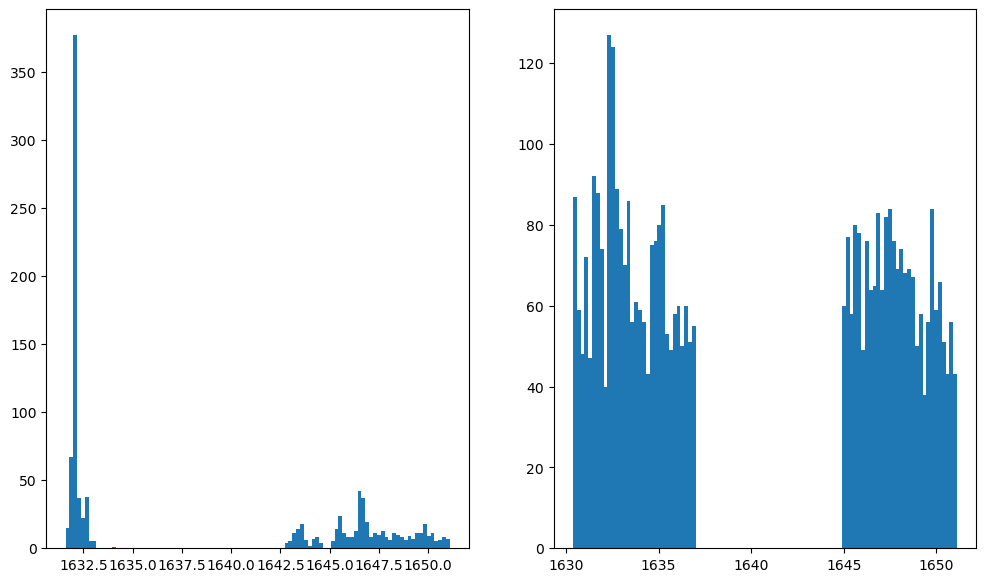

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,7))

ax[0].hist(eleanor[eleanor.pred > 0.7].t_pred,bins=100)
ax[1].hist(spoc[spoc.pred > 0.7].t_pred,bins=100)
plt.show()

In [6]:
test = eleanor[(eleanor.t_pred > 1632.17910353) & (eleanor.t_pred < 1632.37415527)]

# `eleanor` S12

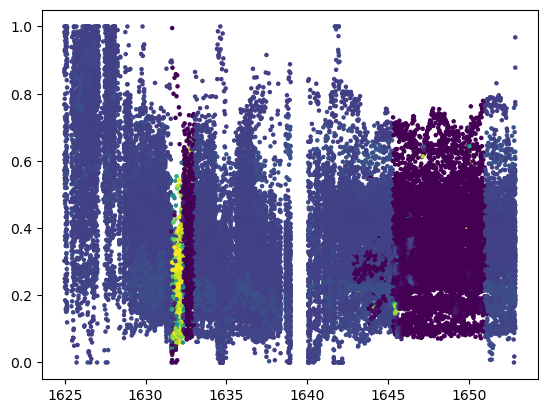

In [7]:
checks = eleanor[(eleanor.pred > 0.7) & (eleanor.t_pred < 1632.5)].reset_index(drop=True)
for i in checks.index[0:50]:
    time = checks.loc[i].time
    flux = checks.loc[i].flux
    preds = checks.loc[i].predictions
    plt.scatter(time,flux,c=preds,s=5)
plt.show()

In [16]:
for i in eleanor.reset_index(drop=True).index[0:300]:
    time = eleanor.loc[i].time
    flux = eleanor.loc[i].flux
    preds = eleanor.loc[i].predictions
    plt.scatter(time,flux,c=preds,s=5)


KeyError: 0

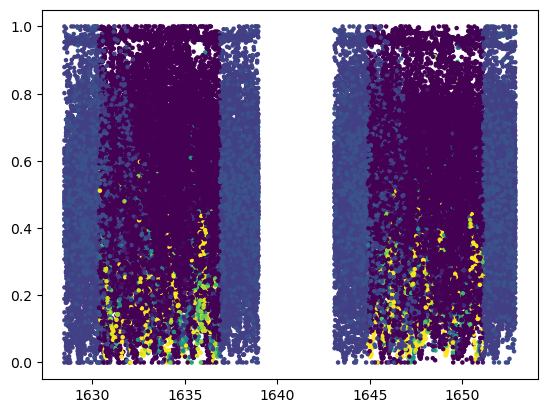

In [9]:
spochecks = spoc.reset_index(drop=True)
for i in spoc.reset_index(drop=True).index[0:300]:
    time = spochecks.loc[i].time
    flux = spochecks.loc[i].flux
    preds = spochecks.loc[i].predictions
    plt.scatter(time,flux,c=preds,s=5)
plt.show()

In [10]:
spoc2 = read('../outputs/spoc-s4.pkl')
eleanor2 = read('../s4.pkl')

In [11]:
spoc2 = spoc2.sample(15000)
eleanor2 = eleanor2.sample(15000)

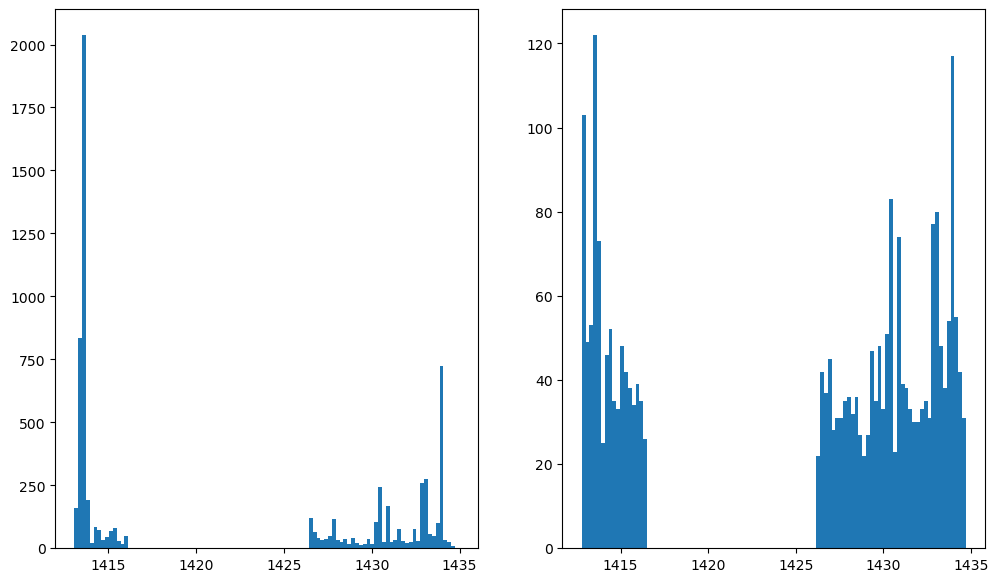

In [12]:
fig, ax = plt.subplots(1,2,figsize=(12,7))

ax[0].hist(eleanor2[eleanor2.pred > 0.7].t_pred,bins=100)
ax[1].hist(spoc2[spoc2.pred > 0.7].t_pred,bins=100)
plt.show()

# `eleanor` S4

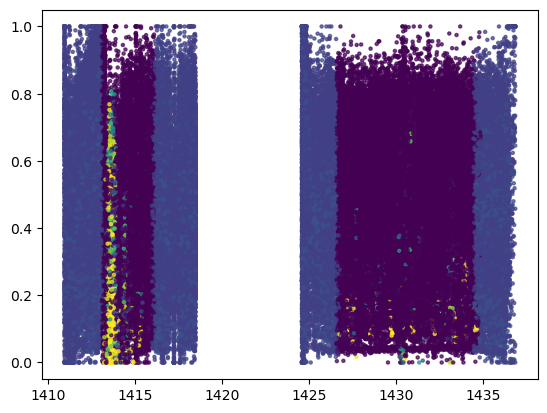

In [13]:
test = eleanor2[(eleanor2.pred > 0.7) & (eleanor2.t_pred < 1415)].reset_index(drop=True)
for i in test.index[0:300]:
    time = test.loc[i].time
    flux = test.loc[i].flux
    preds = test.loc[i].predictions
    plt.scatter(time,flux,c=preds,s=5,alpha=0.7)


# `SPOC` S4

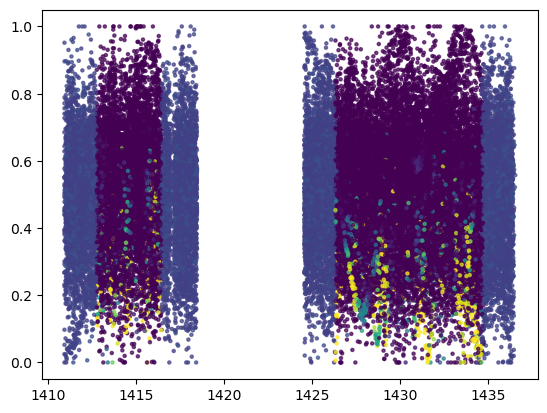

In [14]:
spochecks2 = spoc2.reset_index(drop=True)
for i in spoc2.reset_index(drop=True).index[0:300]:
    time = spochecks2.loc[i].time
    flux = spochecks2.loc[i].flux
    preds = spochecks2.loc[i].predictions
    plt.scatter(time,flux,c=preds,s=5,alpha=0.7)
plt.show()